In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import math

pd.options.mode.chained_assignment = None
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from preprocess.functions.date_inspector import load_files
from eda.functions.eda import show_correlation, show_normalized_mutual_information, show_relative_density_plot

In [3]:
df = pd.read_pickle(os.path.abspath(os.path.join(os.getcwd(), '..', 'data','df_forecast_kpx_fe.pkl')))

In [4]:
y = df['Power Generation(kW)+0']#, 'Power Generation(kW)+1','Power Generation(kW)+2']#.values
X = df.drop(['Power Generation(kW)+0','Power Generation(kW)+1','Power Generation(kW)+2','datetime','date','date(forecast)','datetime(forecast)','location'],axis=1)#.values

In [5]:
from sklearn.metrics import r2_score

def Linear_Regression(x_train, x_test, y_train, y_test):

    model = LinearRegression()
    model.fit(x_train,y_train)

    yhat_train = model.predict(x_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, yhat_train))

    yhat_test = model.predict(x_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
    print('y,yhat :',y_test[0], yhat_test[0])
    print('r square train : ', r2_score(y_train, yhat_train))
    print('r square test : ', r2_score(y_test, yhat_test))
    print('rmse:',train_rmse)
    print('test_rmse :', test_rmse)
    
    return model,yhat_test

In [6]:
def show_plot_linear(model, x, y):
    yhat = model.predict(x)
    
    plt.plot(y, label='true')
    plt.plot(yhat, label='preidction')
    plt.ylabel('power')
    plt.legend()
    plt.show()

## 발전량과 풍속간 관계

In [7]:
df_1 = df.copy()

In [35]:
train_df, test_df = train_test_split(df_1, test_size=0.2,shuffle=False)

In [36]:
train_y_df = train_df['Power Generation(kW)+0']
train_x_df = train_df['Wind Speed(m/s)']
test_y_df = test_df['Power Generation(kW)+0']
test_x_df = test_df['Wind Speed(m/s)']

In [37]:
train_x = train_x_df.values
train_y = train_y_df.values
test_x = test_x_df.values
test_y = test_y_df.values

train_x = train_x.reshape(-1,1)
test_x = test_x.reshape(-1,1)

In [38]:
model_linear, linear = Linear_Regression(train_x,test_x,train_y,test_y)

y,yhat : 0 14021.06808545018
r square train :  0.12616780361321678
r square test :  0.04508470168022127
rmse: 11118.050961299117
test_rmse : 10757.988650017542


In [39]:
target_date = datetime.datetime(2018, 1, 8)
indice = (train_df['date'] == target_date)
train_x_linear = train_x_df[indice].values
train_y_linear = train_y_df[indice].values

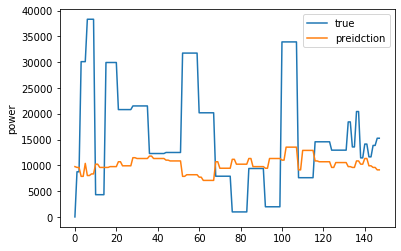

In [40]:
train_x_linear = train_x_linear.reshape(-1,1)
show_plot_linear(model_linear, train_x_linear, train_y_linear)

# 발전량과 모든 변수간의 관계

In [41]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

In [42]:
train_y_df = train_df['Power Generation(kW)+0']
train_x_df = train_df.drop(['Power Generation(kW)+0','datetime','date','datetime(forecast)','date(forecast)','location'],axis=1)
test_y_df = test_df['Power Generation(kW)+0']
test_x_df = test_df.drop(['Power Generation(kW)+0','datetime','date','datetime(forecast)','date(forecast)','location'],axis=1)

In [43]:
train_x = train_x_df.values
train_y = train_y_df.values
test_x = test_x_df.values
test_y = test_y_df.values

In [44]:
model_linear, linear = Linear_Regression(train_x,test_x,train_y,test_y)

y,yhat : 0.0 2824.931960035523
r square train :  0.8756544331207375
r square test :  0.8574827767416896
rmse: 4194.013195303185
test_rmse : 4156.065010447463


### train plot

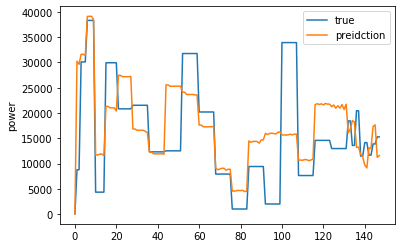

In [45]:
target_date = datetime.datetime(2018, 1, 8)
indice = (train_df['date'] == target_date)
#print('sum:',sum(indice))
train_x_linear = train_x_df[indice].values
train_y_linear = train_y_df[indice].values

show_plot_linear(model_linear, train_x_linear, train_y_linear)
#matplotlib assumes it is a sequence of y values, and automatically generates the x values for you

### test plot

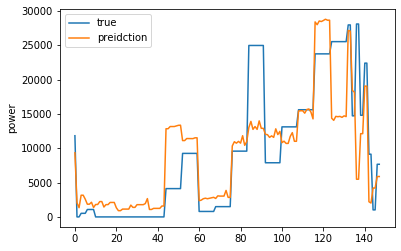

In [48]:
target_date = datetime.datetime(2019, 3, 8)
indice = (test_df['date'] == target_date)

test_x_linear = test_x_df[indice].values
test_y_linear = test_y_df[indice].values

show_plot_linear(model_linear, test_x_linear, test_y_linear)
